# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [63]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [51]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...
iris_df.shape

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


(150, 4)

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


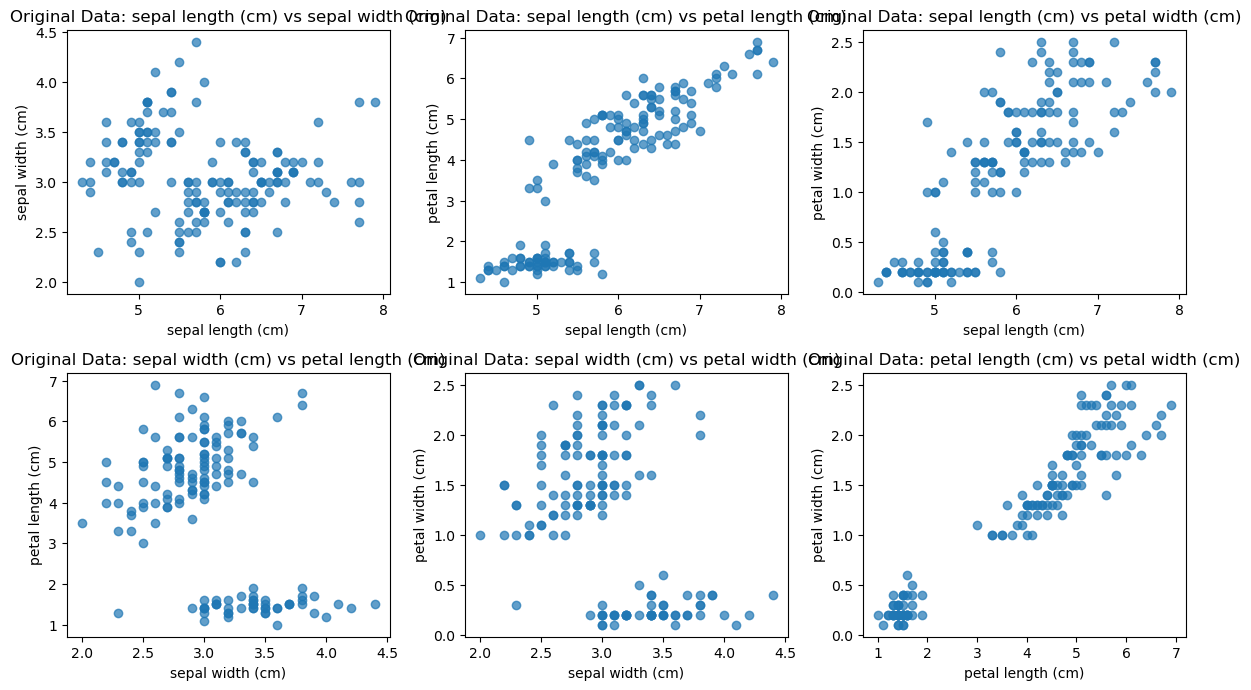

In [52]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

Yes, several patterns emerge from the scatter plots, and these can help distinguish between different species in the Iris dataset:

Petal Length vs Petal Width:
There is a strong positive linear relationship between petal length and petal width. The points form two distinct clusters, one with smaller petal length/width values and one with larger values.
This suggests that species with smaller petals can be easily distinguished from those with larger petals, which can be useful in classification.

Sepal Length vs Petal Length:
There is also a clear positive linear relationship between sepal length and petal length. Similar to petal width, species with shorter petals tend to have shorter sepals, while species with longer petals tend to have longer sepals. This relationship helps separate species with distinct petal/sepal characteristics.

Sepal Length vs Petal Width:
Again, there’s a visible positive relationship, with a clear separation between species that have smaller petals and those with larger petals.

Sepal Width vs Other Features:
How these patterns help distinguish between species:
Petal features (length and width) seem to provide the most information for separating species. For example, Iris-setosa, a species in the dataset, tends to have much smaller petal length and width compared to Iris-versicolor and Iris-virginica, which have larger petals.

Sepal features (particularly sepal length) also help in distinguishing species, though the relationships aren’t as pronounced as with petal dimensions.

In summary, the strong relationships between petal dimensions are key indicators for distinguishing between species in the Iris dataset. When performing classification tasks, focusing on petal length and width will likely yield better results in differentiating between the species.

#### **Question 3:** 
#### Data cleaning

In [61]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

Standardizing features before applying clustering algorithms like K-Means is crucial because it ensures that all features contribute equally to the distance calculations. Without standardization, features with larger scales can dominate the algorithm, leading to biased and inaccurate clusters. Since K-Means relies on Euclidean distance, differences in scale can distort the results and produce clusters based on one feature rather than considering all features equally. Standardization helps avoid this by putting all features on the same scale, improving the accuracy and interpretability of the clustering process> 

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [60]:
# Your answer...
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(scaled_iris_df)

# Create a copy of the DataFrame for clustering and modification
clustered_iris_data = scaled_iris_df.copy()

# Add cluster labels to the copied DataFrame
clustered_iris_data['Cluster'] = clusters.labels_

# Display the updated DataFrame with the 'Cluster' column
clustered_iris_data




c:\Users\Dell\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,0
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


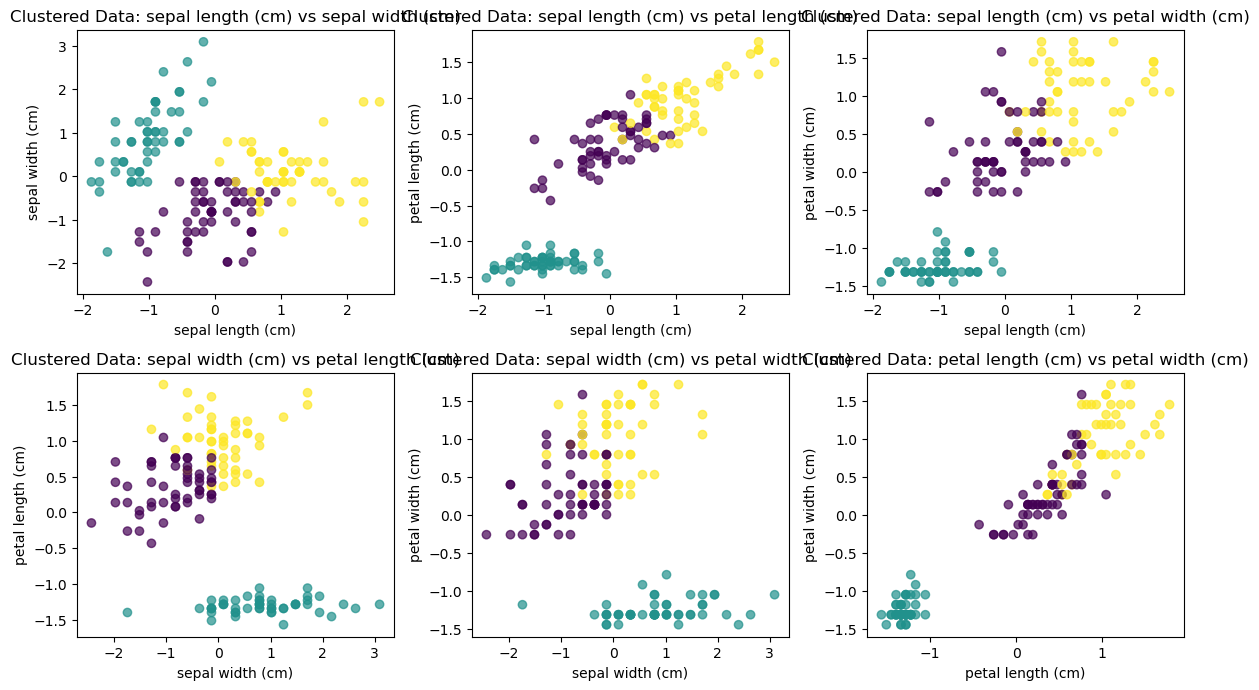

In [69]:
# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

The Elbow Method is commonly used to determine the optimal number of clusters in K-Means. It works by plotting the within-cluster sum of squares (WCSS) against different values of k. As k increases, WCSS decreases, but after a certain point, the improvement slows down, forming an "elbow" shape in the plot. The optimal number of clusters is at this elbow, where adding more clusters provides diminishing returns in reducing WCSS, helping balance model complexity and effectiveness.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [97]:
# Initialize an empty list to store the bootstrap samples
np.random.seed(123)

bootstrap_samples = []

for i in range(10000):
    sample = scaled_iris_df.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)

# Display the combined DataFrame
boot10000

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),replicate
109,1.643844,1.249201,1.331133,1.712096,0
126,0.432165,-0.592373,0.592246,0.790671,0
66,-0.294842,-0.131979,0.421734,0.395774,0
98,-0.900681,-1.282963,-0.430828,-0.130755,0
17,-0.900681,1.019004,-1.340227,-1.183812,0
...,...,...,...,...,...
48,-0.658345,1.479398,-1.283389,-1.315444,9999
67,-0.052506,-0.822570,0.194384,-0.262387,9999
33,-0.416010,2.630382,-1.340227,-1.315444,9999
45,-1.264185,-0.131979,-1.340227,-1.183812,9999


In [98]:
# Calculate the mean price for each bootstrap sample (replicate)
boot_means = boot10000.groupby('replicate')['petal width (cm)'].mean().reset_index(name='mean_petal_width')
boot_means

,replicate,mean_petal_width
0,0,0.059673
1,1,0.073714
2,2,-0.132510
3,3,-0.051775
4,4,-0.053530
...,...,...
9995,9995,-0.014041
9996,9996,-0.066694
9997,9997,-0.064939
9998,9998,-0.057918


In [99]:
boot_means['mean_petal_width'].mean()

0.0011000940415079128

In [100]:

ci_bounds = boot_means["mean_petal_width"].quantile([0.05, 0.95])
ci_bounds


0.05   -0.133431
0.95    0.135142
Name: mean_petal_width, dtype: float64

In [101]:
lower_bound = 0.05
upper_bound = 0.95

# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 0.0011000940415079128
90% Confidence Interval of Mean Petal Width: (0.05, 0.95)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

Estimate Mean with Uncertainty: I used bootstrapping to calculate the mean Petal Width and assess the uncertainty associated with this estimate.

Construct Confidence Intervals: It enables me to create confidence intervals around the mean, indicating the range within which the true population mean is likely to fall.

Flexibility with Distribution Assumptions: Bootstrapping does not require the assumption of normality, which makes it suitable for my dataset that may not follow a normal distribution.

Insight into Data Characteristics: By analyzing the bootstrap means, I can reveal important characteristics of the data, such as skewness or outliers.

Robustness with Small Sample Sizes:It enhances the reliability of my estimates from the Iris dataset, which has a limited sample size.

Facilitating Hypothesis Testing:Bootstrapping helps me compare means across different species or groups without relying on traditional parametric tests.

Understanding About the Mean
Central Estimate: It provides me with a robust estimate of the population mean.
Confidence in Estimates: The confidence intervals reflect the precision of my mean estimate.
Statistical Properties: Examining the bootstrap means helps me assess the bias and variance of the mean estimate.
In summary, bootstrapping enhances my analysis of the Iris dataset by providing reliable mean estimates and confidence intervals, improving my understanding of data variability and characteristics, especially given the small sample size. If you have any more questions, feel free to ask!








**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

Calculating the confidence interval from bootstrap samples serves to quantify uncertainty and reflect the variability of estimates, such as the mean. It provides a range of values within which we can be reasonably confident that the true population parameter lies, illustrating how much the estimate could vary across different samples. A wider interval indicates greater variability and less certainty about the estimate, while a narrower interval suggests higher precision. Confidence intervals also inform decision-making by indicating the significance of differences when comparing groups, and they visually represent the reliability of the estimates. Overall, confidence intervals enhance understanding of the reliability and variability of analysis.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...
Considering the high variabilitiy of the bootstrapped means and a broad confidence interval, the petal width might not be a stable and a reliable estimate. This could have been because of the smaller sample size. However, we can say with 90% certainity that the true population mean could fall anywhere between  -0.133431 and 0.135142.  This means the true population mean could fall anywhere within a wide range of values, which diminishes confidence in the mean as a precise estimate.If the bootstrapped means are widely spread, it suggests that the mean is not stable across different samples. A stable mean should converge around a similar value with little variation; significant variability implies that the sample mean may fluctuate considerably based on the sample chosen.

n summary, if the 90% confidence interval of the bootstrapped means is highly variable, it suggests that the mean is not a reliable measure of central tendency in this context. The high uncertainty and lack of stability in the estimates indicate that the mean may not accurately reflect the true population parameter. Therefore, it’s essential to consider the variability and explore other measures or analyses to gain a more robust understanding of the data.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
